# Pr7-2: OpenCVの組み込みフィルタ

アプリケーションと思ってOpenCVのフィルタ関数を使ってみましょう．

## 入力画像の準備

※ 自分の好きな画像を読み込んでください．

フィルタ処理は大きな画像で計算すると少し重く，またフィルタの効果も見えにくくなるので縮小しておきます．<br>
(横幅が256になるようにしています)


- image size: (256, 554)


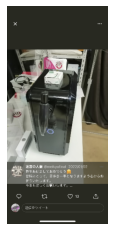

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_file = "basaki.PNG"
I_bgr = cv2.imread(image_file)
I = cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB)

# 可視化用の縮小処理
scale = 256 / I.shape[1] 
I = cv2.resize(I, None, fx = scale, fy = scale)
I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.axis('off')

print("- image size: ({0}, {1})".format(I.shape[1], I.shape[0]))

## 表示用の補助コード

画像I, F1, F2を3枚並べてlabel1, label2のタイトルをつけて表示します． 

In [8]:
def comp_results(I, F1, F2, label1, label2):
    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

    plt.subplot(1, 3, 1)
    plt.imshow(I)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(F1)
    plt.title(label1)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(F2)
    plt.title(label2)
    plt.axis('off')


## ガウシアンフィルタ

ガウシアンフィルタは，cv2.GaussianBlur関数で以下のように呼び出せます．


```
# カーネル: (kx, ky), 標準偏差: sigma
F = cv2.GaussianBlur(I, (kx, ky), sigma)

# カーネルから標準偏差を自動計算
F = cv2.GaussianBlur(I, (kx, ky), 0)

# 標準偏差からカーネルを自動計算
F = cv2.GaussianBlur(I, (0, 0), sigma)

```



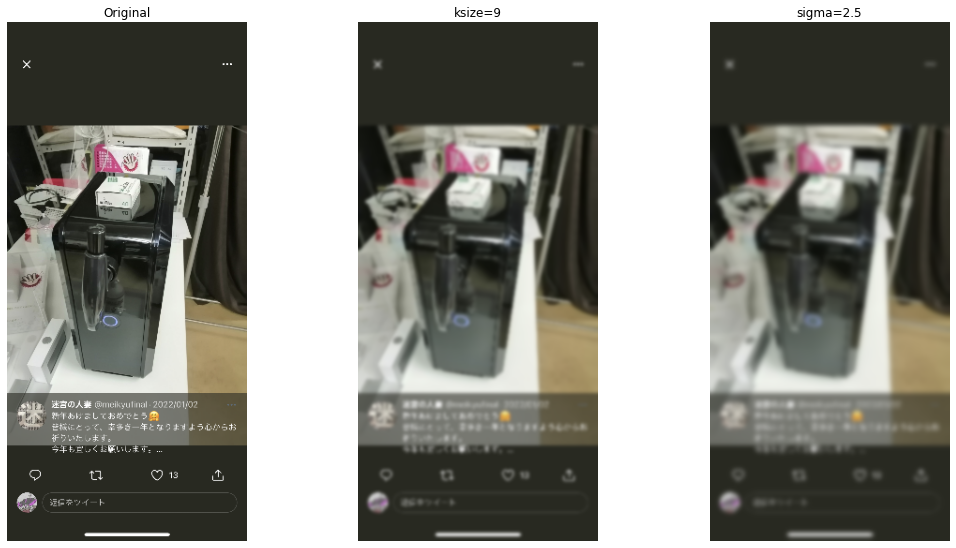

In [9]:
# Work: 値を色々調整してみましょう．
ksize = 9
sigma = 2.5

F1 = cv2.GaussianBlur(I, (ksize, ksize), 0)
F2 = cv2.GaussianBlur(I, (0, 0), sigma)

comp_results(I, F1, F2, "ksize={0}".format(ksize), "sigma={0}".format(sigma))


# 中央値フィルタ（非線形）

cv2.medianBlur()関数でカーネル内の中央値から算出したフィルタ結果を出力できます．


```
# カーネル: ksize (奇数を指定)
F = cv2.medianBlur(I,ksize)
```

※ cv2.medianBlurはfloat型の画像だと上手く動きません．


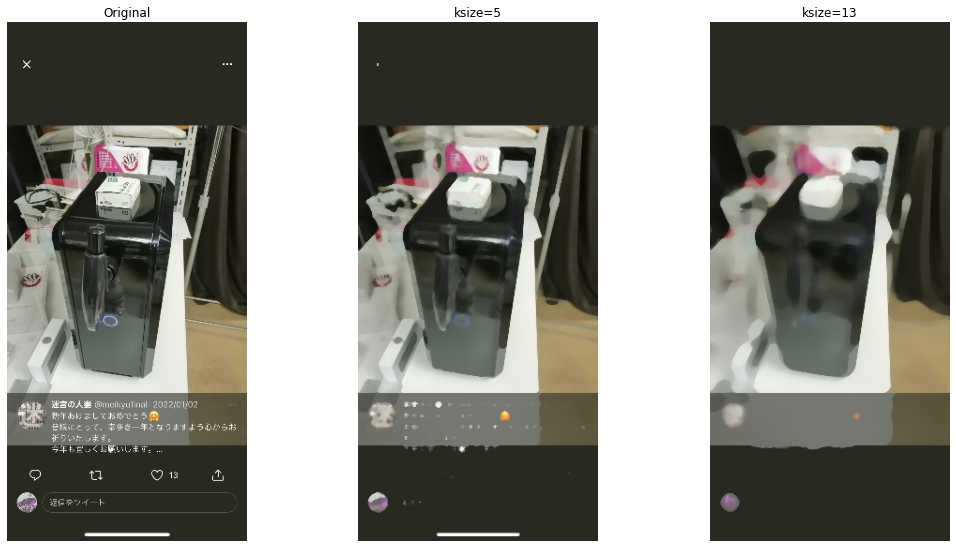

In [10]:
# Work: 値を色々調整してみましょう．
ksize1=5
ksize2=13

F1 = cv2.medianBlur(I,ksize1)
F2 = cv2.medianBlur(I,ksize2)

comp_results(I, F1, F2, "ksize={0}".format(ksize1), "ksize={0}".format(ksize2))

# バイラテラルフィルタ (非線形)

cv2.bilateralFilter関数でエッジ保存フィルタを計算することができます．
- sigma_r: 色空間の標準偏差
- sigma_s: xy空間の標準偏差

```
# カーネル: ksize, 色空間の標準偏差: sigma_r, xy空間の標準偏差: sigma_s
F = cv2.bilateralFilter(I,ksize,sigma_r, sigma_s)

# カーネルはsigma_sから自動計算可能
F = cv2.bilateralFilter(I,0,sigma_r, sigma_s)
```



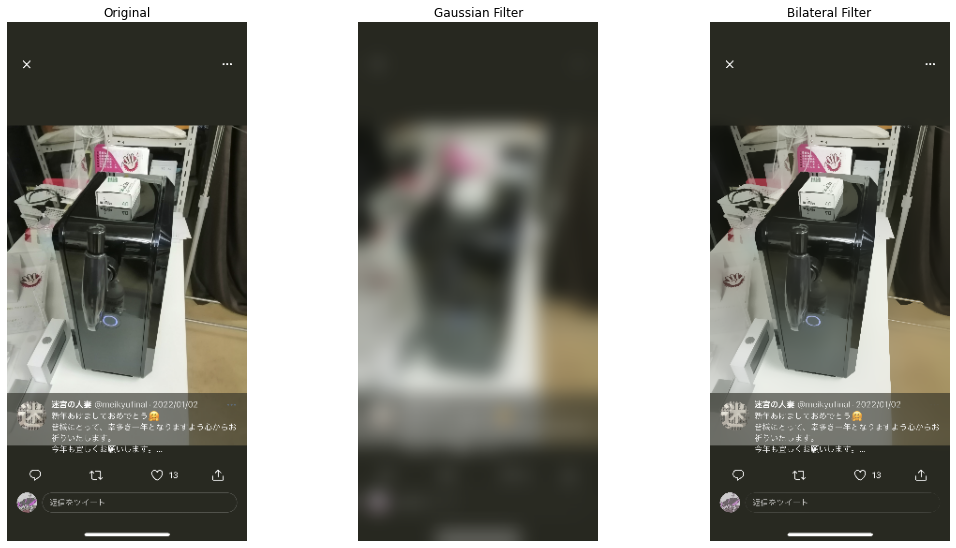

In [11]:
# Work: 値を色々調整してみましょう．
sigma_s = 10
sigma_r = 50

F1 = cv2.GaussianBlur(I,(0,0), sigma_s)
F2 = cv2.bilateralFilter(I,0,sigma_r, sigma_s)

comp_results(I, F1, F2, "Gaussian Filter", "Bilateral Filter")

# NPRフィルタで遊んでみましょう

エッジ保存型フィルタの延長線でcv2.stylizationのフィルタでスタイル化できます．

```
F = cv2.stylization(I, sigma_s=sigma_s, sigma_r=sigma_r)
```

他にも色々なNPRフィルタがあるので試すと面白いです．
（以下はパラメータの例）

```
F = cv2.edgePreservingFilter(I, flags=1, sigma_s=30, sigma_r=0.2)
F = cv2.detailEnhance(I, sigma_s=7, sigma_r=0.1)
F_gray, F = cv2.pencilSketch(I, sigma_s=20, sigma_r=0.2, shade_factor=0.05)
```

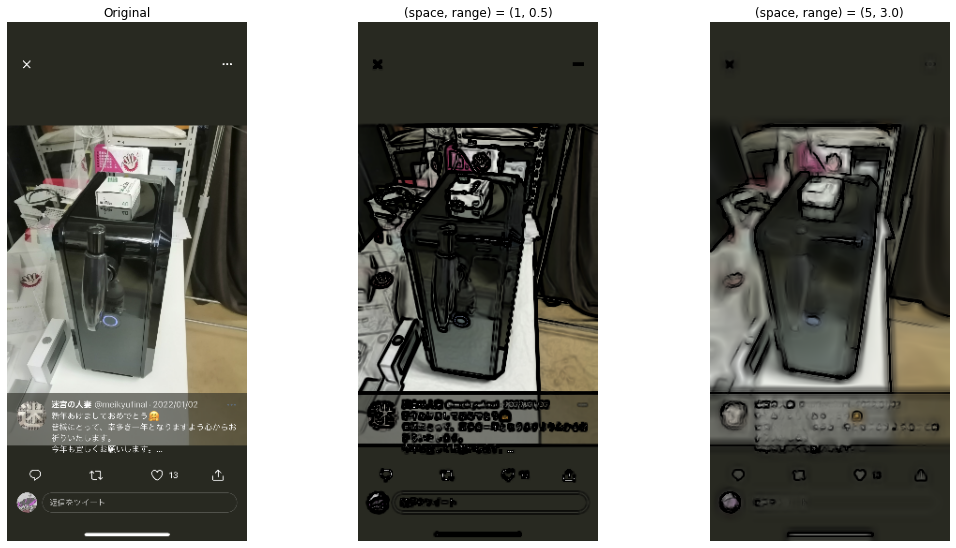

In [12]:
# Work: 値を色々調整してみましょう．
sigma_s1 = 1
sigma_r1 = 0.5

sigma_s2 = 5
sigma_r2 = 3.0

F1 = cv2.stylization(I, sigma_s=sigma_s1, sigma_r=sigma_r2)
F2 = cv2.stylization(I, sigma_s=sigma_s2, sigma_r=sigma_r2)

comp_results(I, F1, F2, "(space, range) = ({0}, {1})".format(sigma_s1, sigma_r1), "(space, range) = ({0}, {1})".format(sigma_s2, sigma_r2))


## OpenCVの微分フィルタ

### Sobelフィルタ

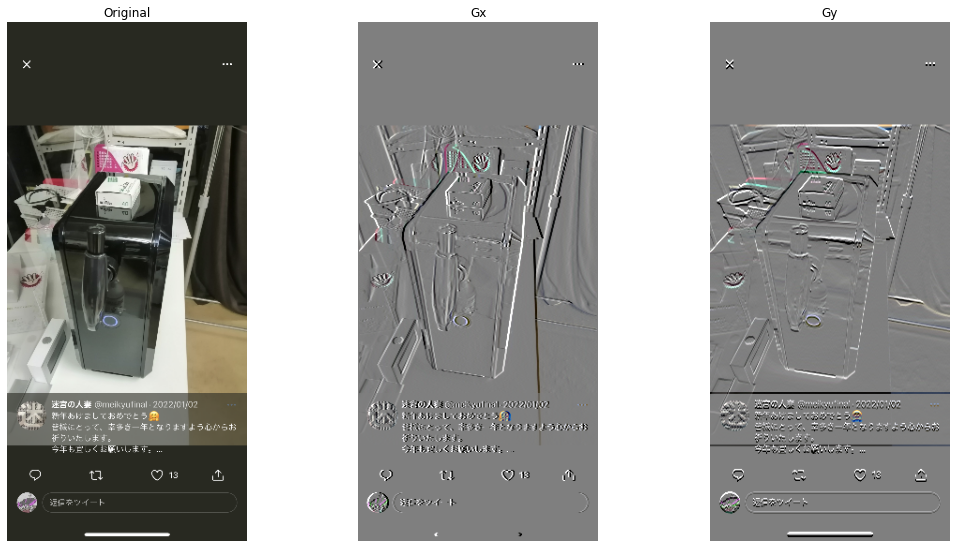

In [13]:
I_float = np.float64(I / 255.0)

Gx = cv2.Sobel(I_float,cv2.CV_64F,1,0,ksize=1)
Gy = cv2.Sobel(I_float,cv2.CV_64F,0,1,ksize=1)

comp_results(I, np.clip(Gx+0.5, 0, 1), np.clip(Gy+0.5, 0, 1), "Gx", "Gy")

### Laplacianフィルタ

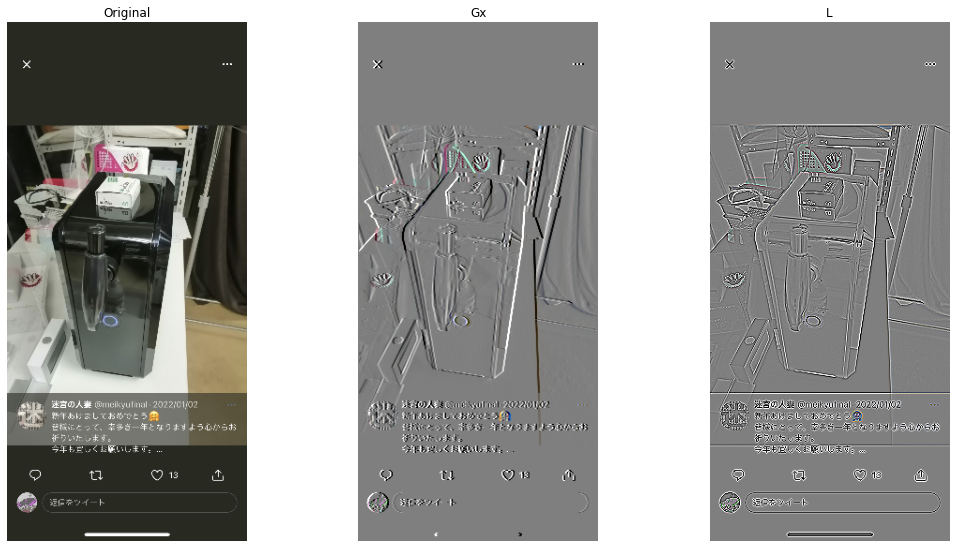

In [14]:
L = cv2.Laplacian(I_float,cv2.CV_64F)

comp_results(I, np.clip(Gx+0.5, 0, 1), np.clip(L+0.5, 0, 1), "Gx", "L")